<a href="https://colab.research.google.com/github/mayankjain281/Excel_Ecommerce_Store/blob/main/Python_business_analytics_sample_superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Business Analytics : Sample Superstore***

##### **Superstoere E-commerce platform allows people to buy products from books, toys, clothes, and shoes to food, furniture, and other household items.**
##### **"Our task is to analyse the sales data and identify weak areas and opportunities for Super Store to boost business growth."**



## ***We expect following Q/As from the Business point of view : -***



* **Which Category is Best Selling and Most Profitable?**

* **What are the Best Selling and Most Profitable Sub-Category?**

* **Which is the Top Selling Sub-Category?**

* **Which Customer Segment is Most Profitable?**

* **Which is the Preferred Ship Mode?**

* **Which Region is the Most Profitable?**

* **Which City has the Highest Number of Sales?**

#### ***Let suppose that the Super Store is a family business and is owned by 1 or 2 owners who are very invested in their business. Moreover people who are not expert in reading charts or interpreting statistical analysis, so our analysis will be in layman terms and easy to understand.***

## **Import the libraries and read the dataset.**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_excel('/content/sample_superstore.xls')

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## **Data types of columns**

In [9]:
df.shape

(9994, 21)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

## **Handling the missing values**

In [18]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

**It seems no missing values were there**

## **Remove Duplicated rows**

In [24]:
# Find the number of duplicate data

df.duplicated().sum()

0

In [22]:
 # Drop the duplicated rows

df.drop_duplicates(inplace = True)

# Find the no. of rows and columns
df.shape

(9994, 21)

***Result shows that there are 0 duplicated rows.***

## **Statical Summary**

In [26]:
df['Profit Margin %'] = (df.Profit / df.Sales) * 100

In [29]:
# Get descriptive statistics summary

df.drop(['Row ID','Postal Code'], axis=1).describe()

,Sales,Quantity,Discount,Profit,Profit Margin %
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896,12.031393
std,623.245101,2.225110,0.206452,234.260108,46.675435
min,0.444000,1.000000,0.000000,-6599.978000,-275.000000
25%,17.280000,2.000000,0.000000,1.728750,7.500000
50%,54.490000,3.000000,0.200000,8.666500,27.000000
75%,209.940000,5.000000,0.200000,29.364000,36.250000
max,22638.480000,14.000000,0.800000,8399.976000,50.000000


**Total quantity sold was 37820, and 4 on average for each transaction. This can range from 1 to a highest quantity of 14 products for an individual transaction.**

**Total sales value was USD 2296195, and USD 230 on average for each transaction. This can range from USD 0.44 to a highest sales value of USD 22638.48 for an individual transaction.**

**Overall, the Superstore made profit of USD 28.69 on average for each transaction. However, this can range from a loss of USD 6599.98 to a profit of USD 8399.98 for an individual transaction. Higher discounts likely played a major role in the more signifant losses.**

**Average discount was 16% for each transaction. This can range from no discount to a notable highest discount of 80% for an individual transaction. The higher discounts were likely from festivals, end-of-season sales, and clearance sales for stocks that are of older fashion.**

In [40]:
df.describe(include=object)

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


**What we want to focus is the unique count and frequency of the categorical features such as**

* **There are 4 ship modes and 3 customer segments. Nearly half of the orders are from Consumer segment using Standard Class shipment.**

* **The store carries 3 category of items with 17 sub-category. 60% of orders are for Office Supplies and at least 15% purchases are for Binders.**

## ***A. Which Category is Best Selling and Most Profitable?***

In [54]:
 # Group sales, profit and quantity by category

df1 = pd.DataFrame(df.groupby(['Category'])[['Sales', 'Profit', 'Quantity']].sum())

df1

,Sales,Profit,Quantity
Category,,,
Furniture,741999.7953,18451.2728,8028
Office Supplies,719047.0320,122490.8008,22906
Technology,836154.0330,145454.9481,6939


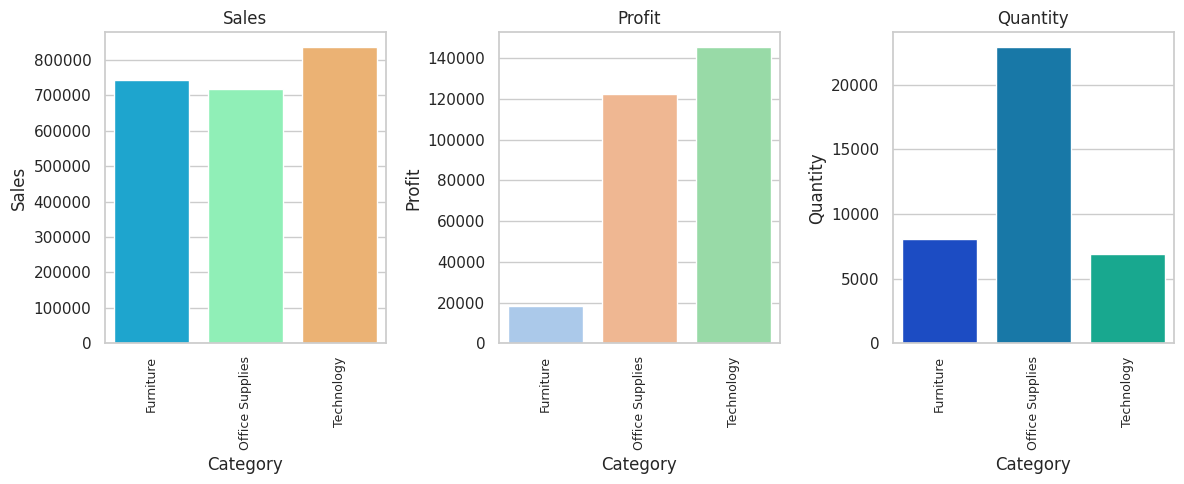

In [57]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(12, 5))
# Plot barplots
cat1 = sns.barplot(x = df1.index, y = df1.Sales, ax=axis[0], palette = "rainbow")
cat2 = sns.barplot(x = df1.index, y = df1.Profit, ax=axis[1], palette = "pastel")
cat3 = sns.barplot(x = df1.index, y = df1.Quantity, ax=axis[2], palette = "winter")
# Set titles
cat1.set(title = 'Sales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity')
# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat3.get_xticklabels(), rotation = 'vertical', size = 9)
# Set spacing between subplots
figure.tight_layout()

### **Our observations are:**


* **All 3 categories — Furniture and Office Supplies were make similar amount of sales but Technology amount of sales was higher**

* **Technology is Best Selling and it’s good to know that this category is the Most Profitable too. Only minimal quantity is sold as these products are usually one-off purchases that can last at least 4–5 years.**

* **Furniture is the least profitable and quantity sold are at a minimum too.**

* **Office Supplies sells the most in terms of quantity as it is relatively cheap product.**

## ***B. What are the Best Selling and Most Profitable Sub-Category?***

In [60]:
# Group by sub-category

df2 = pd.DataFrame(df.groupby(['Sub-Category'])[['Sales', 'Profit']].sum())

# Sort by descending order according to sales

subcat_df2 = pd.DataFrame(df2.sort_values('Sales', ascending = False)).reset_index()

subcat_df2

,Sub-Category,Sales,Profit
0,Phones,330007.0540,44515.7306
1,Chairs,328449.1030,26590.1663
2,Storage,223843.6080,21278.8264
3,Tables,206965.5320,-17725.4811
4,Binders,203412.7330,30221.7633
5,Machines,189238.6310,3384.7569
6,Accessories,167380.3180,41936.6357
7,Copiers,149528.0300,55617.8249
8,Bookcases,114879.9963,-3472.5560
9,Appliances,107532.1610,18138.0054


In [61]:
 # Sort by descending order according to profit

subcat_profit_df2 = pd.DataFrame(subcat_df2.sort_values('Profit', ascending = False))

subcat_profit_df2

,Sub-Category,Sales,Profit
7,Copiers,149528.0300,55617.8249
0,Phones,330007.0540,44515.7306
6,Accessories,167380.3180,41936.6357
11,Paper,78479.2060,34053.5693
4,Binders,203412.7330,30221.7633
1,Chairs,328449.1030,26590.1663
2,Storage,223843.6080,21278.8264
9,Appliances,107532.1610,18138.0054
10,Furnishings,91705.1640,13059.1436
14,Envelopes,16476.4020,6964.1767


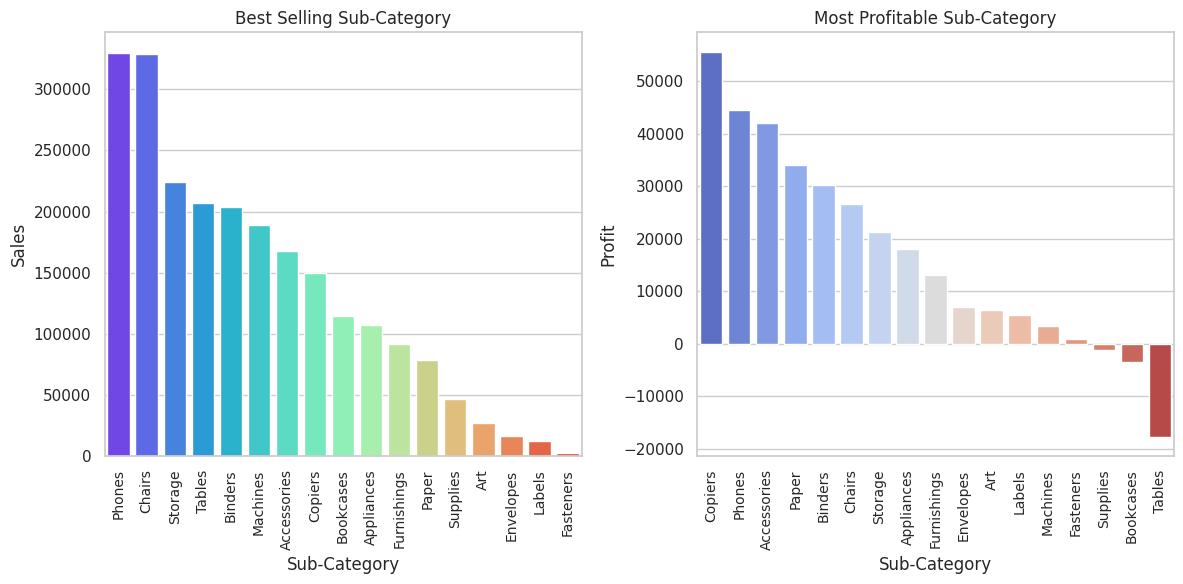

In [65]:
sns.set_theme(style="whitegrid")


figure, axis = plt.subplots(1, 2, figsize=(12, 6))

subcat1 = sns.barplot(data = subcat_df2, x = subcat_df2['Sub-Category'], y = subcat_df2.Sales, ax=axis[0], palette = "rainbow")
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)

subcat2 = sns.barplot(data = subcat_profit_df2, x = subcat_profit_df2['Sub-Category'], y = subcat_profit_df2.Profit, ax=axis[1], palette = "coolwarm")
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 10)

figure.tight_layout()

plt.show()

### **Let’s analyse the bar plots:**

* **Phones and Chairs are Top 2 best selling sub-category.**

* **Copiers produces most profit, followed by Phones, Accessories, Papers and Binders. The marketing strategy has to focus on marketing these products.**

* **On the other end of the spectrum, Machines, Fasteners, Supplies, Bookcases and Tables make close to zero margin to losses. These are products that Super Store can consider dropping from the product catalogue or increase the sale price and profit margin or bargain for a lower price from the supplier.**

## ***C. Which is the Top Selling Sub-Category?***

In [66]:
df3 = pd.DataFrame(df.groupby(['Sub-Category'])[['Quantity']].sum().sort_values('Quantity',ascending=False))

df3

,Quantity
Sub-Category,
Binders,5974
Paper,5178
Furnishings,3563
Phones,3289
Storage,3158
Art,3000
Accessories,2976
Chairs,2356
Appliances,1729


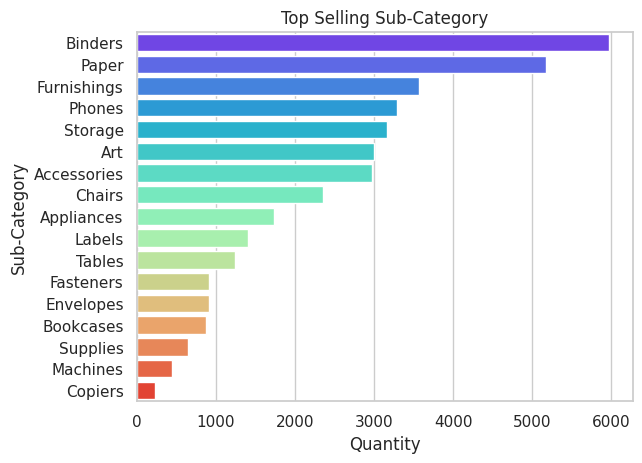

In [67]:
sns.set_theme(style="whitegrid")
sns.barplot(data = df3, y = df3.index, x = df3.Quantity, palette = "rainbow")
plt.title("Top Selling Sub-Category")
plt.show()

### **Here, we can deduce that**

* **Super Store should ensure inventory are always well-stocked for the top selling sub-category such as Binders, Paper, Furnishings and Phones.**

* **Despite being most profitable, Copiers sell the least only 234, but as it is a relatively expensive office equipment that is usually used for few years, it is understandable that it sells the least among all.**

## ***D. Which Customer Segment is Most Profitable?***

In [68]:
df4 = pd.DataFrame(df.groupby(['Segment'])[['Profit']].sum())

df4

,Profit
Segment,
Consumer,134119.2092
Corporate,91979.1340
Home Office,60298.6785


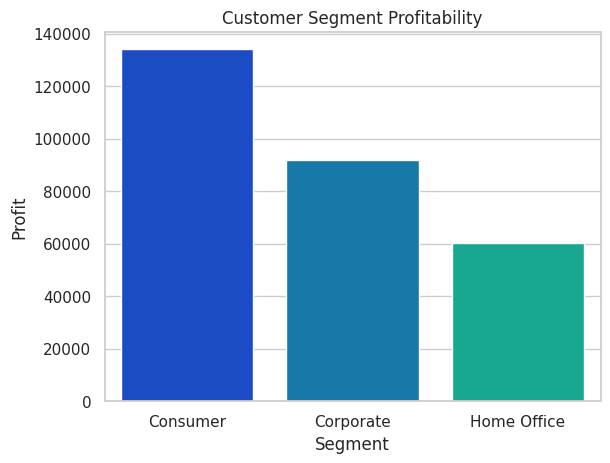

In [69]:
sns.set_theme(style="whitegrid")
sns.barplot(data = df4, x = df4.index, y = df4.Profit, palette = "winter")
plt.title("Customer Segment Profitability")
plt.show()

**Consumer segment is most profitable, followed by Corporate Segment and Home Office. Hence, marketing strategy has to target or place more focus on retaining Consumer and Corporate Segment customers.**

## ***E. Which is the Preferred Ship Mode?***

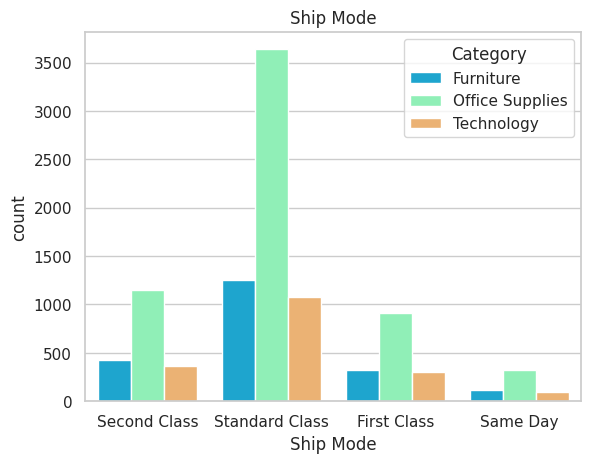

In [77]:
# Plot shipment mode
sns.set_theme(style="whitegrid")
sns.countplot(x=df['Ship Mode'], hue=df['Category'], palette = "rainbow")

plt.title("Ship Mode")

plt.show()

**Standard Class is the preferred method of shipment in all the categories and perhaps the cheapest one too. The other modes are not popular among the customers and may be too costly.**

## ***F. Which Region is the Most Profitable?***

In [78]:
df5 = pd.DataFrame(df.groupby(['Region'])['Profit'].sum().reset_index())

df5

,Region,Profit
0,Central,39706.3625
1,East,91522.7800
2,South,46749.4303
3,West,108418.4489


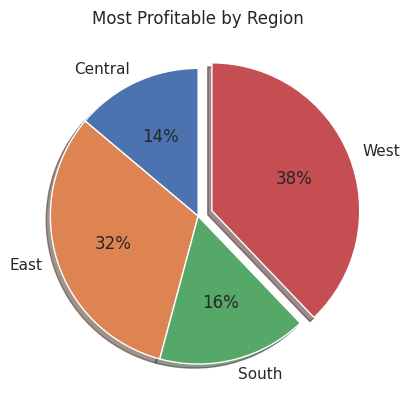

In [79]:
explode = [0, 0, 0, 0.1]
plt.pie(df5.Profit, labels = df5.Region, startangle = 90, autopct = "%1.0f%%", explode = explode, shadow = True)

plt.title("Most Profitable by Region")

plt.show()

#### **East and West region are most profitable.**

## ***G. Which City has the Highest Number of Sales?***

In [80]:
city_sales_df = pd.DataFrame(df.groupby(['City'])['Sales', 'Quantity'].sum().sort_values('Sales',ascending = False))

top10 = city_sales_df[:10]     # or city_sales_df.head(10)

top10

<ipython-input-80-f80e3e616213>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  city_sales_df = pd.DataFrame(df.groupby(['City'])['Sales', 'Quantity'].sum().sort_values('Sales',ascending = False))


,Sales,Quantity
City,,
New York City,256368.1610,3417
Los Angeles,175851.3410,2879
Seattle,119540.7420,1590
San Francisco,112669.0920,1935
Philadelphia,109077.0130,1981
Houston,64504.7604,1466
Chicago,48539.5410,1132
San Diego,47521.0290,670
Jacksonville,44713.1830,429


In [81]:
bottom10 = city_sales_df[-10:]      # or city_sales_df.tail(10)

bottom10

,Sales,Quantity
City,,
Missouri City,6.370,7
Keller,6.000,2
Layton,4.960,4
Springdale,4.300,2
San Luis Obispo,3.620,2
Ormond Beach,2.808,3
Pensacola,2.214,3
Jupiter,2.064,1
Elyria,1.824,1


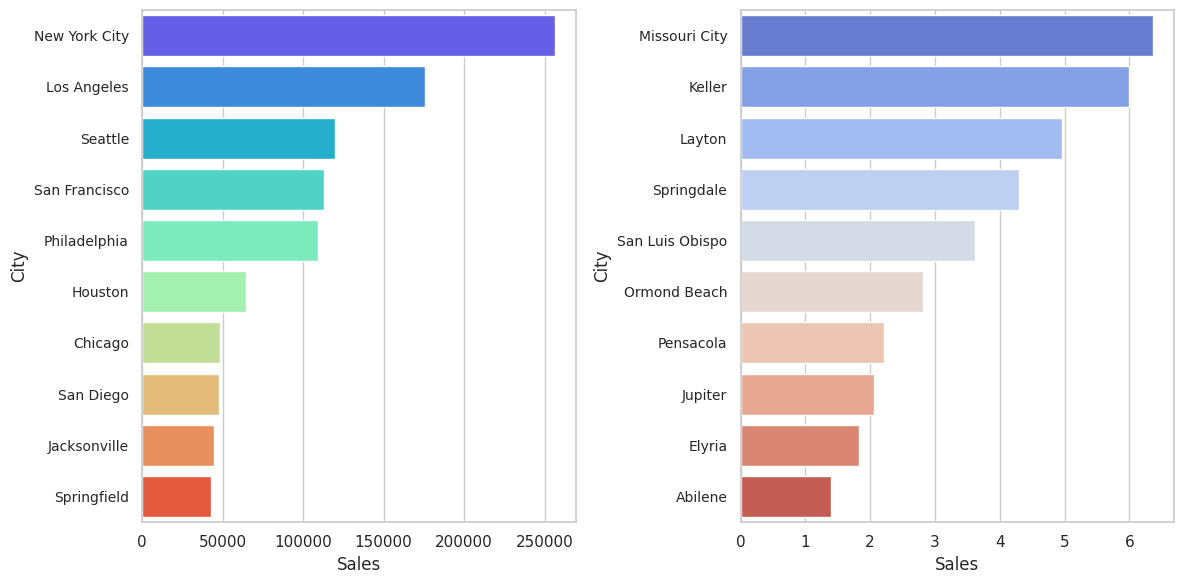

In [85]:
figure, axis = plt.subplots(1,2, figsize=(12, 6))

sns.set_theme(style="whitegrid")


top10c = sns.barplot(data = top10, y = top10.index, x = top10.Sales, palette = "rainbow", ax = axis[0])
#top10c.set(Title = "Top 10 Cities with Highest Sales")
top10c.set_yticklabels(top10c.get_yticklabels(),size = 10)

# Plot Bar Plot for Best Selling Sub-Category
bottom10c = sns.barplot(data = bottom10, y = bottom10.index, x = bottom10.Sales, palette = "coolwarm", ax=axis[1])
#bottom10c.set(Title = "Bottom 10 Cities with Lowest Sales")
bottom10c.set_yticklabels(bottom10c.get_yticklabels(),size = 10)

# Set spacing between subplots

figure.tight_layout()
plt.show()

#### **The above left bar garph shows the top 10 cities and right side shows the bottom 10 cities**

#### **There is a huge disparity between the cities with highest sales and lowest sales. Marketing strategy has to target the top 10 cities.**

## **Recommendations : -**

* ***Focus on Technology sub-category and Phones and Chairs as they are highest selling and most profitable. Bundle them with the less profitable products such as Bookcases, Table and Chairs to offset the losses.***

* ***Selling Bookcases and Tables result in huge losses, so Super Store has to consider to bundle them together with High Selling or Profitable sub-category such as Chairs, Copiers, Phones and Office Supplies products.***

* ***For Home Offices customers, these people might be busy with work and less likely to spend time selecting individual products, so create a Home Office package with products used for offices such as table, chairs, phone, copiers, storage, label, fasteners, bookcases.***

* ***For loss-making products like Supplies, Bookcases, Tables, consider to either drop these from the catalogue or change suppliers and bargain for cheaper price.***

* ***Consumer and Corporate Segment make up more than 70% of customerbase. Target them, especially customers from the East and West region in the Top 10 cities with Highest Sales by introducing special promotions and bundles for mass Consumer and Home Offices and send promotional emails or flyers.***